# Abass Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## EDA

In [3]:
df = pd.read_csv('../data/zillow_data.csv')

In [4]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [5]:
df = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')

In [7]:
df.head()

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,time,value
0,60657,84654,1,Chicago,IL,Chicago,Cook,1996-04,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,1996-04,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1996-04,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,1996-04,77300.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901595 entries, 0 to 3901594
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   RegionName  int64  
 1   RegionID    int64  
 2   SizeRank    int64  
 3   City        object 
 4   State       object 
 5   Metro       object 
 6   CountyName  object 
 7   time        object 
 8   value       float64
dtypes: float64(1), int64(3), object(5)
memory usage: 267.9+ MB


In [26]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m', errors= 'coerce')

## Feature engineering

### Webscraping

In [43]:
import json
import requests
from bs4 import BeautifulSoup

In [44]:
headers = requests.utils.default_headers()
headers.update({
'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
})

url = f'https://www.unitedstateszipcodes.org/{84654}/'

In [45]:
res = requests.get(url, headers=headers)
soup = BeautifulSoup(res.content, 'html.parser')

In [47]:
pop_group = json.loads(soup.find_all('script')[11].string.strip().replace('\t', '').replace('\n', '')[154:-1433])

In [76]:
pd_dict = {'zipcode': [],'year': [], 'population': []}

In [56]:
pop_group['values']

[{'x': 2005, 'y': 2378},
 {'x': 2006, 'y': 2401},
 {'x': 2007, 'y': 2570},
 {'x': 2008, 'y': 2505},
 {'x': 2009, 'y': 2574},
 {'x': 2010, 'y': 2571},
 {'x': 2011, 'y': 2486},
 {'x': 2012, 'y': 2420},
 {'x': 2013, 'y': 2430},
 {'x': 2014, 'y': 2440},
 {'x': 2015, 'y': 2410},
 {'x': 2016, 'y': 2410},
 {'x': 2017, 'y': 2470},
 {'x': 2018, 'y': 2430}]

In [77]:
for i in pop_group['values']:
    pd_dict['year'].append(i['x'])
    pd_dict['population'].append(i['y'])
    pd_dict['zipcode'].append(84654)

In [201]:
test_df = pd.DataFrame.from_dict(pd_dict)


In [202]:
test_df['year'] = pd.to_datetime(test_df['year'], format='%Y')

In [203]:
test_df.set_index('year', inplace = True)

In [204]:
test_df

,zipcode,population
year,,
2005-01-01,84654,2378
2006-01-01,84654,2401
2007-01-01,84654,2570
2008-01-01,84654,2505
2009-01-01,84654,2574
2010-01-01,84654,2571
2011-01-01,84654,2486
2012-01-01,84654,2420
2013-01-01,84654,2430


In [205]:
test_df = test_df.resample('M').first()

In [206]:
test_df

,zipcode,population
year,,
2005-01-31,84654.0,2378.0
2005-02-28,NaN,NaN
2005-03-31,NaN,NaN
2005-04-30,NaN,NaN
2005-05-31,NaN,NaN
...,...,...
2017-09-30,NaN,NaN
2017-10-31,NaN,NaN
2017-11-30,NaN,NaN


In [190]:
test_df = test_df.interpolate(method = 'spline', order = 2)

<AxesSubplot:xlabel='year'>

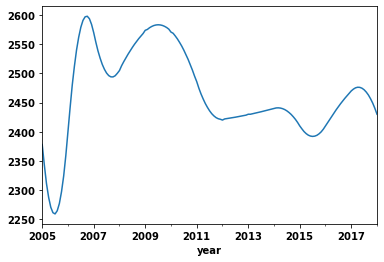

In [155]:
test_df['population'].plot()

In [ ]:
zipcode_df = pd.DataFrame(columns=['zipcode', 'population', 'annual_income'])
# We'll create a fucntion to webscrape all the unique zipcode values
def scrape_data(zipcode):
    # Setting up the web scraper
    headers = requests.utils.default_headers()
    headers.update({
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
    })

    url = f'https://www.unitedstateszipcodes.org/{zipcode}/'

    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.content, 'html.parser')
    
    # We'll firstly retrieve the populations
    population_group = json.loads(soup.find_all('script')[11].string.strip().replace('\t', '').replace('\n', '')[154:-1433])
    population = population_group['values'][-5]['y']
    
    # We'll then retrieve the area of the zipcode in square miles
    land_area = float(soup.find_all('td', class_='text-right')[4].get_text())
    
    # We can then find population density per year
    pop_density = population / land_area
    
    # The water area
    water_area = float(soup.find_all('td', class_='text-right')[5].get_text())
    
    # Average income per zipcode
    # We need to make special adjustments for 1 zipcode
    if zipcode != 98039:
        income_group = json.loads(soup.find_all('script')[-16].string.strip().replace('\t', '').replace('\n', '')[154:-1488])
        income = income_group['values'][-5]['y']
    elif zipcode == 98039:
        income_group = json.loads(soup.find_all('script')[-16].string.strip().replace('\t', '').replace('\n', '')[154:-1555])
        income = income_group['values'][-5]['y']

    
    # Number of nearby schools in the zipcode
    nearby_schools = int(len(soup.find_all('div', class_='nearby-school')))
    
    # Then add them to the zipcode dataframe
    zipcode_dictionary = {'zipcode': zipcode,'population': population, 'land_area': land_area, 'pop_density': pop_density, 'water_area': water_area, 'income': income, 'nearby_schools': nearby_schools}
    
    return zipcode_dictionary

In [ ]:
zipcode_df = pd.DataFrame(columns=['zipcode', 'population', 'land_area', 'pop_density', 'water_area', 'income', 'nearby_schools'])

# We'll create a fucntion to webscrape all the unique zipcode values
def scrape_data(zipcode):
    # Setting up the web scraper
    headers = requests.utils.default_headers()
    headers.update({
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
    })

    url = f'https://www.unitedstateszipcodes.org/{zipcode}/'

    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.content, 'html.parser')
    
    # We'll firstly retrieve the populations
    population_group = json.loads(soup.find_all('script')[11].string.strip().replace('\t', '').replace('\n', '')[154:-1433])
    population = population_group['values'][-5]['y']
    
    # We'll then retrieve the area of the zipcode in square miles
    land_area = float(soup.find_all('td', class_='text-right')[4].get_text())
    
    # We can then find population density per year
    pop_density = population / land_area
    
    # The water area
    water_area = float(soup.find_all('td', class_='text-right')[5].get_text())
    
    # Average income per zipcode
    # We need to make special adjustments for 1 zipcode
    if zipcode != 98039:
        income_group = json.loads(soup.find_all('script')[-16].string.strip().replace('\t', '').replace('\n', '')[154:-1488])
        income = income_group['values'][-5]['y']
    elif zipcode == 98039:
        income_group = json.loads(soup.find_all('script')[-16].string.strip().replace('\t', '').replace('\n', '')[154:-1555])
        income = income_group['values'][-5]['y']

    
    # Number of nearby schools in the zipcode
    nearby_schools = int(len(soup.find_all('div', class_='nearby-school')))
    
    # Then add them to the zipcode dataframe
    zipcode_dictionary = {'zipcode': zipcode,'population': population, 'land_area': land_area, 'pop_density': pop_density, 'water_area': water_area, 'income': income, 'nearby_schools': nearby_schools}
    
    return zipcode_dictionary